In [1]:
import xarray as xr
import numpy as np
import matplotlib.gridspec as gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mplc
import cartopy.util as cutil
import matplotlib.path as mpath
import matplotlib as mpl
import matplotlib.colors as mplc
from matplotlib import pyplot as plt
import pandas as pd
#importing any necessary packages

# Instructions from Vimont:

load in TS and Landfrac, when landfrac is not equal to zero set equal to NaN

if temp in the remaining data is less than -1.8 degrees Celsius this is an indicator of ice, set this to NaN too.

Weighted average is cosine of latutde then normalize

plot the time series, then months, then seasons

looking to show a strong seasonality

<b><font size = 15, color = "#F53400">Opening Datasets & Primary Investigation</font></b>

In [2]:
df_1 = xr.open_dataset("b.e21.BHIST.f09_g17.CMIP6-historical.003.cam.h0.LANDFRAC.185001-201412.nc")
#opening the first file with LANDFRAC into an xarray dataset

In [3]:
df_2 = xr.open_dataset("b.e21.BHIST.f09_g17.CMIP6-historical.003.cam.h0.TS.185001-201412.nc")
#opening the second file with TS into another xarray dataset

In [4]:
print(df_1.lat[1] - df_1.lat[0])
print(df_1.lat[190] - df_1.lat[189])
#course investigation finds that it seems to be constant latitudinal grid spacing of ~ 0.94 degrees

print((df_1.lat[1] - df_1.lat[0]) * (len(df_1.lat) -1))
#we can continue with confidence that our latitudinal grid spacing is this constant value

<xarray.DataArray 'lat' ()>
array(0.94240838)
<xarray.DataArray 'lat' ()>
array(0.94240838)
<xarray.DataArray 'lat' ()>
array(180.)


In [5]:
print(df_1.lon[1] - df_1.lon[0])
print(df_1.lon[190] - df_1.lon[189])
#course investigation finds that it seems to be constant longitudinal grid spacing of 1.25 degrees

print((df_1.lon[1] - df_1.lon[0]) * (len(df_1.lon)))
#we can continue with confidence that our longitudinal grid spacing is this constant value

<xarray.DataArray 'lon' ()>
array(1.25)
<xarray.DataArray 'lon' ()>
array(1.25)
<xarray.DataArray 'lon' ()>
array(360.)


### Explanations

One of the first things I wanted to do was look at the spacing of the coordinates in this dataset, it appears that the distance between any two latitude points is 0.94240838 degrees. This can be confirmed by looking at the size of the df_1 lattitude array with length 192. Multiplying the step size of 0.94240838 degrees by 191, the number of steps, the product returns 180. I investigated the longitudes the same way and found that there is a consistent step size of 1.25 degrees and array length of 288.

look futher into this LANDFRAC data variable, it has to do with values greater than 1 being covered by some sort percentage of land and zeros being water. There are 1980 arrays. Within one there are 192 arrays, each with individual length of 288.

This is organized by time, then latitude, then longitude

the date range of this data is from Jan 1 1850 to Jan 1 2015

<b><font size = 10, color = "#F53400">Investigating TS and Landfrac</font></b>

In [6]:
df_1

#looking into df_1 to see coordinates & data variables in more detail, specifically the time and Landfrac

print(df_1.time)
print(df_1.LANDFRAC)

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2014, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2015, 1, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bnds
<xarray.DataArray 'LANDFRAC' (time: 1980, lat: 192, lon: 288)>
[109486080 values with dtype=float32]
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Att

In [7]:
Landfrac = df_1.LANDFRAC
#creating a new xarray data array by pulling the LANDFRAC data variable out of df_1

Landfrac = Landfrac.where(Landfrac == 0)
#modifying the new Landfrac data array to only include ocean values by selecting entries where Landfrac is zero

Landfrac.attrs["units"]="unitless Ratio from 0 - 1"
Landfrac.attrs["long_name"]="Land Fraction"
#adding attributes like "units" and "long_name" to the new data array

print(Landfrac.attrs)
#investigating the attributes

{'units': 'unitless Ratio from 0 - 1', 'long_name': 'Land Fraction', 'cell_methods': 'time: mean'}


In [8]:
df_2

#looking into df_2 to see coordinates & data variables in more detail, specifically TS

<xarray.Dataset>
Dimensions:       (lat: 192, zlon: 1, nbnd: 2, lon: 288, lev: 32, ilev: 33, time: 1980)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * zlon          (zlon) float64 0.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/27)
    zlon_bnds     (zlon, nbnd) float64 ...
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) float64 ...
    TS            (time, lat, lon) float32 ...
Attributes:
    Conventions:       CF-1.0
    source:            CAM
    case:              b.e21.BHIST.f09_g17.CMIP6-historical.003
    logname:           cmip6
    host:              cheyenne3
    initial_file:      b.e21.B1850.f09_g17.CMIP6-piControl.001.cam.i.0661-01-...
    topography_file:   /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/fv_0.9x1...
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    time_period_freq:  month_1

In [9]:
temps_K = df_2.TS
#Creating a new xarray data array from the surface temperature variable 

temps_C = temps_K - 273.15
#Converting the entries from Kelvin to Celsius by subtracting 273.15 from each surface temperature

temps_C.attrs["units"]="Celsius"
temps_C.attrs["long_name"]="Surface Temperature"
#adding attributes like "units" and "long_name" to the new data array

print(temps_C.attrs)
#investigating the attributes

{'units': 'Celsius', 'long_name': 'Surface Temperature'}


<b><font size = 20, color = "#F53400">Primary Visualization and Data Combing</font></b>

In [10]:
No_Ice = temps_C.where(temps_C > -1.8)
#creating an xarray data array only containing data with Landfrac equal to zero and temperature above the -1.8 C threshold.
#This effectively creates a data array of grids with oceans and without sea ice.

Land = temps_C.where(Landfrac!=0)
#creating another data array as a land mask

Text(0.5, 1.0, 'Surface Temperature Over Non-Iced Ocean')

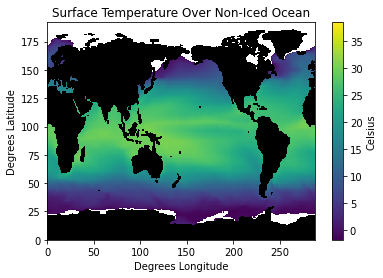

In [11]:
cmap1 = mplc.ListedColormap(['#000000'])
#creating a single value colorbar to create the landmask
plt.pcolormesh(No_Ice[0])
plt.colorbar().set_label("Celsius")
plt.pcolormesh(Land[0], cmap = cmap1)
plt.xlabel("Degrees Longitude")
plt.ylabel("Degrees Latitude")
plt.title("Surface Temperature Over Non-Iced Ocean")

In [12]:
new_area_lats = No_Ice.where(No_Ice.lat >= 30).where(No_Ice.lat <= 75)
#shaving down the No_Ice data array to the specified latitudes

final_area = new_area_lats.where(new_area_lats.lon >= 300 + new_area_lats.lon[0])
#shaving down the above array to the specified longitudes

#we now have the exact rectangle of area we are considered with
#the data spans from 30 - 75 N, and 0 - 60 W

Text(0.5, 1.0, 'Surface Temperature Over Non-Iced Ocean')

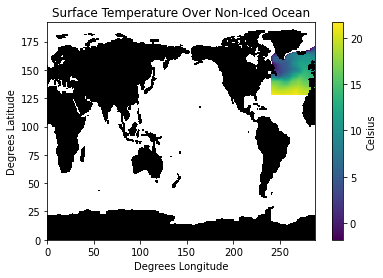

In [13]:
plt.pcolormesh(final_area[0])
plt.colorbar().set_label("Celsius")
plt.pcolormesh(Land[0], cmap = cmap1)
plt.xlabel("Degrees Longitude")
plt.ylabel("Degrees Latitude")
plt.title("Surface Temperature Over Non-Iced Ocean")

#plotting the final area of interest on pcolormesh

In [14]:
months = final_area.groupby("time.month")
years = final_area.groupby("time.year")

print(months)
print(years)
#creating another xarray data array by grouping

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.
DataArrayGroupBy, grouped over 'year'
166 groups with labels 1850, 1851, 1852, ..., 2014, 2015.


In [15]:
monthly_means = months.mean("time")
#creating an xarray data array 
#from the available data each individual entry is now the average of its monthly value with all identical months
#This averages each months entries over all the years

yearly_means = years.mean("time")
#creating an xarray data array 
#this array averages all the available data within a year

Text(0.5, 1.0, 'Meaned Surface Temperature Over Non-Iced Ocean')

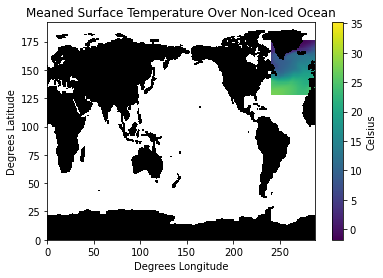

In [16]:
plt.pcolormesh(monthly_means[8])
plt.colorbar().set_label("Celsius")
plt.pcolormesh(Land[0], cmap = cmap1)
plt.xlabel("Degrees Longitude")
plt.ylabel("Degrees Latitude")
plt.title("Meaned Surface Temperature Over Non-Iced Ocean")

#investigating and plotting from the monthly_means data array

In [17]:
cosine_weighted_lats=final_area*np.cos(final_area.lat * np.pi/180)
cosine_weighted_lats.shape
#this data array has the available data and has its values normalized
#by cosine weighting based on the latitude of the measurement
#this data array can be useful for measurements involving area

(1980, 192, 288)

Text(0.5, 1.0, 'Cosine Weighted Surface Temperature Over Non-Iced Ocean')

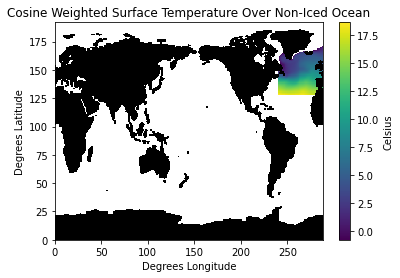

In [18]:
plt.pcolormesh(cosine_weighted_lats[0])
plt.colorbar().set_label("Celsius")
plt.pcolormesh(Land[0], cmap = cmap1)
plt.xlabel("Degrees Longitude")
plt.ylabel("Degrees Latitude")
plt.title("Cosine Weighted Surface Temperature Over Non-Iced Ocean")

#plotting the first index of the cosine weighted latitude to investigate the differences

<b><font size = 20, color = "#F53400">Improved Intercomparisons of Data & Visualizations using Cartopy</font></b>

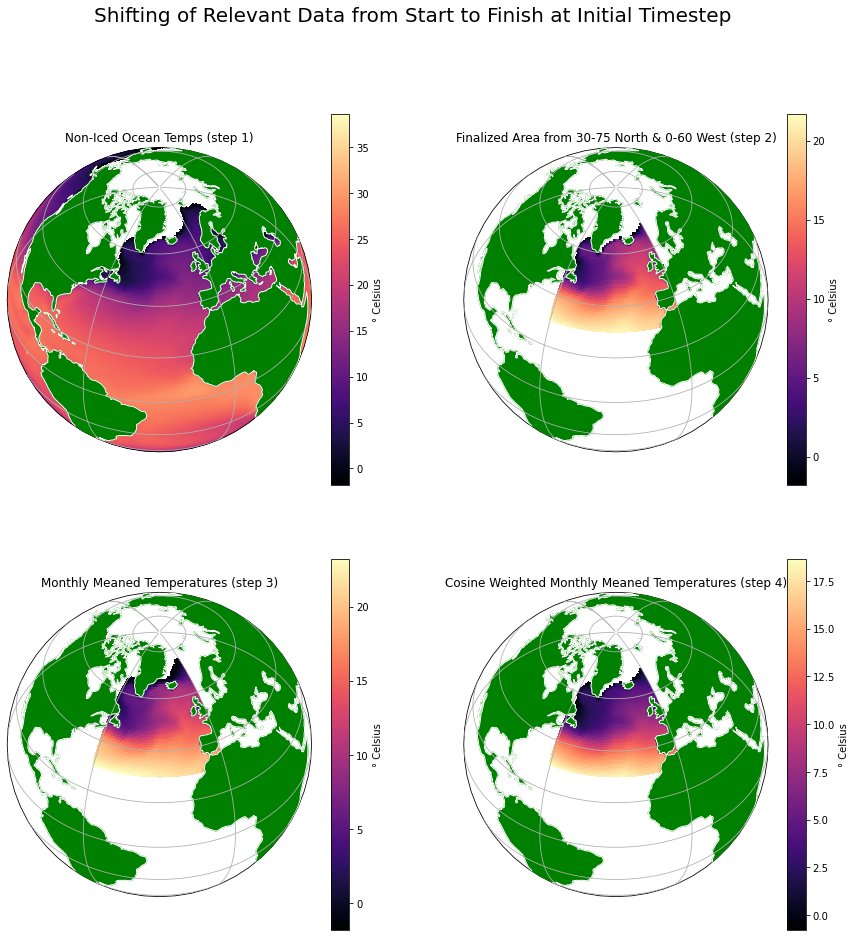

In [19]:
fig,ax=plt.subplots(2,2,figsize=(15,15), subplot_kw = {'projection':ccrs.Orthographic(central_latitude=42.5,central_longitude=-30)})
axs=ax.flatten()

#creating baseline for a four panel plot of Orthographic projections to illustrate 
#the dwindling down of the dataset and how averaging and weighting affects the values

l1=axs[0].pcolormesh(No_Ice.lon, No_Ice.lat,No_Ice[0],cmap=plt.cm.magma, transform=ccrs.PlateCarree())
axs[0].coastlines(color='w', zorder = 200)
axs[0].add_feature(cfeature.LAND,color='g', zorder = 100)
axs[0].gridlines(zorder = 300)
axs[0].set_title("Non-Iced Ocean Temps (step 1)")
plt.colorbar(l1, ax = axs[0], label = "° Celsius")

#Utilizing Cartopy to plot the No_Ice dataframe

l1=axs[1].pcolormesh(final_area.lon, final_area.lat, final_area[0],cmap=plt.cm.magma, transform=ccrs.PlateCarree())
axs[1].coastlines(color='w', zorder = 200)
axs[1].add_feature(cfeature.LAND,color='g', zorder = 100)
axs[1].gridlines(zorder = 300)
axs[1].set_title("Finalized Area from 30-75 North & 0-60 West (step 2)")
plt.colorbar(l1, ax = axs[1], label = "° Celsius")

#Utilizing Cartopy to plot the final_area dataframe

l1=axs[2].pcolormesh(monthly_means.lon, monthly_means.lat, monthly_means[0],cmap=plt.cm.magma, transform=ccrs.PlateCarree())
axs[2].coastlines(color='w', zorder = 200)
axs[2].add_feature(cfeature.LAND,color='g', zorder = 100)
axs[2].gridlines(zorder = 300)
axs[2].set_title("Monthly Meaned Temperatures (step 3)")
plt.colorbar(l1, ax = axs[2], label = "° Celsius")

#Utilizing Cartopy to plot the monthly_means dataframe

l1=axs[3].pcolormesh(cosine_weighted_lats.lon,cosine_weighted_lats.lat, cosine_weighted_lats[0],cmap=plt.cm.magma, transform=ccrs.PlateCarree())
axs[3].coastlines(color='w', zorder = 200)
axs[3].add_feature(cfeature.LAND,color='g', zorder = 100)
axs[3].gridlines(zorder = 300)
axs[3].set_title("Cosine Weighted Monthly Meaned Temperatures (step 4)")
plt.colorbar(l1, ax = axs[3], label = "° Celsius")

#Utilizing Cartopy to plot the cosine_weighted_latitudes dataframe

plt.suptitle("Shifting of Relevant Data from Start to Finish at Initial Timestep", fontsize = 20)
plt.show()

#Using Cartopy to visualize our data we can now more intuitively and accurately depict 
#the range, narrowing and values of relevant data at each step in the process

<b><font size = 20, color = "#F53400">Preparing Data for Use in Climatology</font></b>

In [20]:
months_weighted = cosine_weighted_lats.groupby("time.month")

#print(months_weighted.groups)

In [21]:
weighted_monthly_means = cosine_weighted_lats.mean(["lat", "lon"])
#creating a scalar quantity which is the average of the cosine weighted temperatures
#this allows me to create a climatology of the area in question

print(weighted_monthly_means.shape)
#double checking the new dataframe that I created, accessing the shape shows 1980 array entries as desired

(1980,)


In [22]:
weighted_monthly_means["time"] = pd.date_range(start = "01/01/1850", end = "12/01/2014", freq = "MS")
#using pandas date_range function we can manipulate the time coordinate of the weighted_monthly_means to more accurately
#reflect what is known to be the true interpretations of these timestamps

In [23]:
weighted_monthly_means.time
#we can now investigate the time coordinate of our weighted_monthly_means to see if our editing of the date range worked.
#We now see that the indices of our time coordinates have been shifted back one month and to the first date of the month

<xarray.DataArray 'time' (time: 1980)>
array(['1850-01-01T00:00:00.000000000', '1850-02-01T00:00:00.000000000',
       '1850-03-01T00:00:00.000000000', ..., '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2014-12-01

In [24]:
Months = weighted_monthly_means.groupby("time.month")
#Here we are creating an xarray DataArrayGroupBy, this object acts similarly to a dictionary in nature 
#as it creates 12 keys of months January - December (1-12) and stores the values as the indices of the binning month 
#from the weighted_monthly_means dataframe.

In [25]:
January = weighted_monthly_means.isel(time = Months.groups[1])
February = weighted_monthly_means.isel(time = Months.groups[2])
March = weighted_monthly_means.isel(time = Months.groups[3])
April = weighted_monthly_means.isel(time = Months.groups[4])
May = weighted_monthly_means.isel(time = Months.groups[5])
June = weighted_monthly_means.isel(time = Months.groups[6])
July = weighted_monthly_means.isel(time = Months.groups[7])
August = weighted_monthly_means.isel(time = Months.groups[8])
September = weighted_monthly_means.isel(time = Months.groups[9])
October = weighted_monthly_means.isel(time = Months.groups[10])
November = weighted_monthly_means.isel(time = Months.groups[11])
December = weighted_monthly_means.isel(time = Months.groups[12])

#Leveraging the power of the Months DataArrayGroupBy/Dictionary that we had just made we can now create 12 seperate 
#data arrays that only contain temperatures from the key/month that we feed into the time parameter
#all data arrays now have the cosine weighted temperatures of their binned month and length 165

In [26]:
D = December[:-1]
J = January[1:]
F = February[1:]

#To create the seasonality data arrays we need to include the proper data from each constituent month. 
#The issue with DJF though is that we need the correct sequential order of "wrapped" data. 
#To mend this issue we use list comprehension to exclude the first entry from January and February
#and the last entry from December.

In [27]:
DJF = (D.values + J.values + F.values)/3

MAM = (March.values + April.values + May.values)/3

JJA = (June.values + July.values + August.values)/3

SON = (September.values + October.values + November.values)/3

#using the subsidiary monthly data arrays created two cells above and the edited D, J, F arrays as well we can combine 
#them into a single array by adding the values of each and then average them by dividing each entry in seasonal data arrays
#by 3. This results in DJF measuring in length 164 and MAM, JJA, & SON measuring 165.

In [28]:
time = np.arange(0, 165, 1)
#creating an array of length 165 to simulate the timesteps necessary for temperatures to be plotted against

time2 = np.arange(0, 164, 1)
#creating another array of length 164 to simulate the timesteps for temps to be plotted against DJF seasonal data

<b><font size = 20, color = "#F53400">Plotting Monthly & Seasonal Data</font></b>

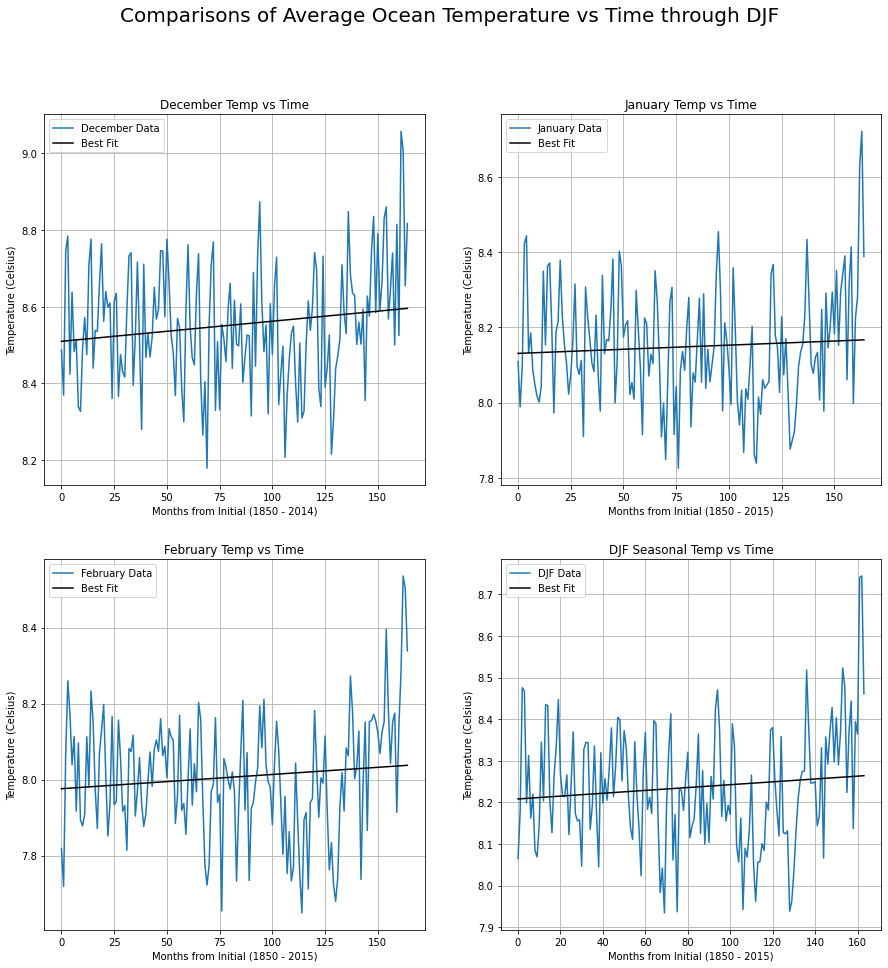

In [29]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
axs=ax.flatten()

#creating a 2x2 panel figure for the following DJF pertinent data

l1=axs[0].plot(time, December, label = "December Data")
m, b = np.polyfit(time, December, 1)
axs[0].plot(time, m*time + b, "black", label = "Best Fit")
axs[0].set_title("December Temp vs Time")
axs[0].set_xlabel("Months from Initial (1850 - 2014)")
axs[0].set_ylabel("Temperature (Celsius)")
axs[0].grid()
axs[0].legend()


#plotting monthly cosine weighted TS data from December vs time

l2=axs[1].plot(time, January, label = "January Data")
m, b = np.polyfit(time, January, 1)
axs[1].plot(time, m*time + b, "black", label = "Best Fit")
axs[1].set_title("January Temp vs Time")
axs[1].set_xlabel("Months from Initial (1850 - 2015)")
axs[1].set_ylabel("Temperature (Celsius)")
axs[1].grid()
axs[1].legend()


#plotting monthly cosine weighted TS data from January vs time

l3=axs[2].plot(time, February, label = "February Data")
m, b = np.polyfit(time, February, 1)
axs[2].plot(time, m*time + b, "black", label = "Best Fit")
axs[2].set_title("February Temp vs Time")
axs[2].set_xlabel("Months from Initial (1850 - 2015)")
axs[2].set_ylabel("Temperature (Celsius)")
axs[2].grid()
axs[2].legend()


#plotting monthly cosine weighted TS data from February vs time

l4=axs[3].plot(time2, DJF, label = "DJF Data")
m, b = np.polyfit(time2, DJF, 1)
axs[3].plot(time2, m*time2 + b, "black", label = "Best Fit")
axs[3].set_title("DJF Seasonal Temp vs Time")
axs[3].set_xlabel("Months from Initial (1850 - 2015)")
axs[3].set_ylabel("Temperature (Celsius)")
axs[3].grid()
axs[3].legend()


#plotting seasonal cosine weighted TS data from DJF vs time

plt.suptitle("Comparisons of Average Ocean Temperature vs Time through DJF", fontsize = 20)
plt.show()

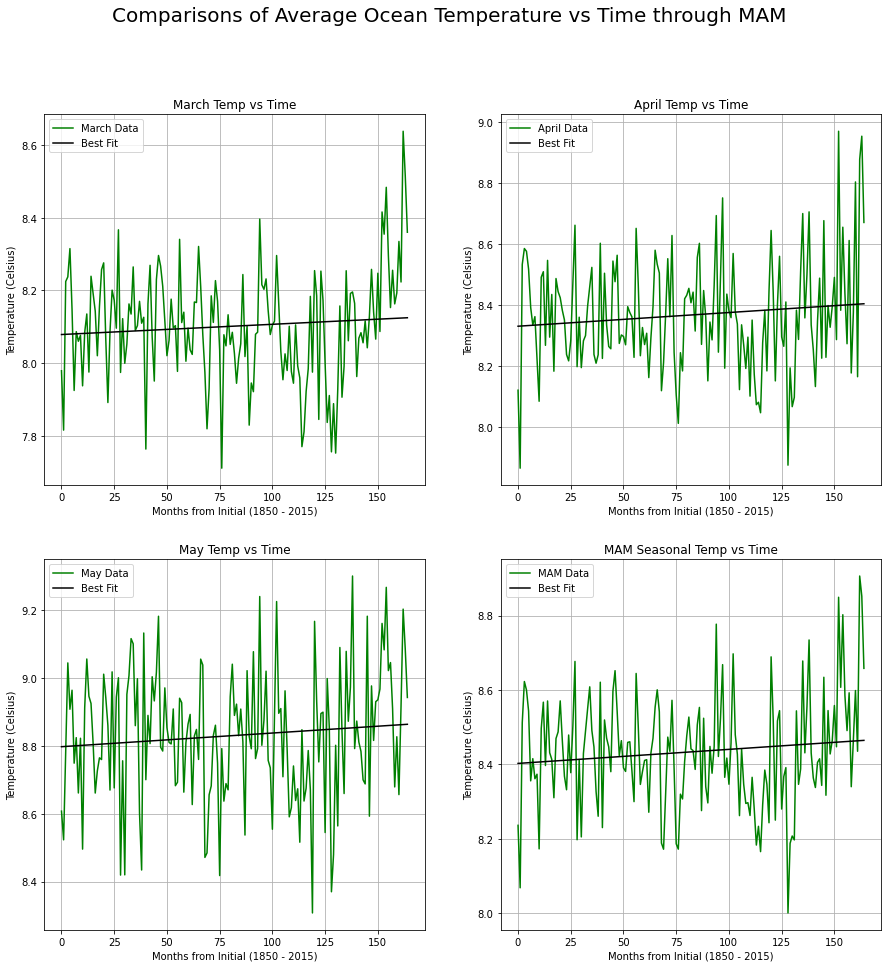

In [30]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
axs=ax.flatten()

#creating a 2x2 panel figure for the following MAM pertinent data

l1=axs[0].plot(time, March, "g", label = "March Data")
m, b = np.polyfit(time, March, 1)
axs[0].plot(time, m*time + b, "black", label = "Best Fit")
axs[0].set_title("March Temp vs Time")
axs[0].set_xlabel("Months from Initial (1850 - 2015)")
axs[0].set_ylabel("Temperature (Celsius)")
axs[0].grid()
axs[0].legend()

#plotting monthly cosine weighted TS data from March vs time

l2=axs[1].plot(time, April, "g", label = "April Data")
m, b = np.polyfit(time, April, 1)
axs[1].plot(time, m*time + b, "black", label = "Best Fit")
axs[1].set_title("April Temp vs Time")
axs[1].set_xlabel("Months from Initial (1850 - 2015)")
axs[1].set_ylabel("Temperature (Celsius)")
axs[1].grid()
axs[1].legend()


#plotting monthly cosine weighted TS data from April vs time

l3=axs[2].plot(time, May, "g", label = "May Data")
m, b = np.polyfit(time, May, 1)
axs[2].plot(time, m*time + b, "black", label = "Best Fit")
axs[2].set_title("May Temp vs Time")
axs[2].set_xlabel("Months from Initial (1850 - 2015)")
axs[2].set_ylabel("Temperature (Celsius)")
axs[2].grid()
axs[2].legend()


#plotting monthly cosine weighted TS data from May vs time

l4=axs[3].plot(time, MAM, "g", label = "MAM Data")
m, b = np.polyfit(time, MAM, 1)
axs[3].plot(time, m*time + b, "black", label = "Best Fit")
axs[3].set_title("MAM Seasonal Temp vs Time")
axs[3].set_xlabel("Months from Initial (1850 - 2015)")
axs[3].set_ylabel("Temperature (Celsius)")
axs[3].grid()
axs[3].legend()

#plotting seasonal cosine weighted TS data from MAM vs time

plt.suptitle("Comparisons of Average Ocean Temperature vs Time through MAM", fontsize = 20)
plt.show()

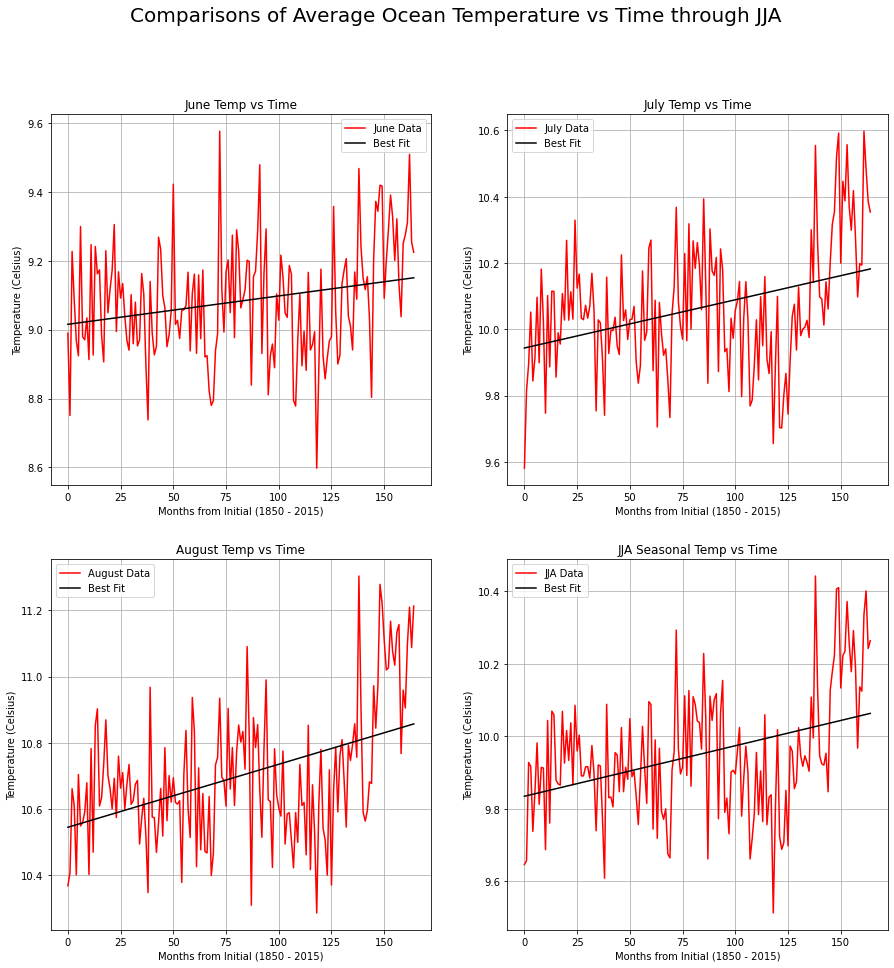

In [31]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
axs=ax.flatten()

#creating a 2x2 panel figure for the following JJA pertinent data

l1=axs[0].plot(time, June, "r", label = "June Data")
m, b = np.polyfit(time, June, 1)
axs[0].plot(time, m*time + b, "black", label = "Best Fit")
axs[0].set_title("June Temp vs Time")
axs[0].set_xlabel("Months from Initial (1850 - 2015)")
axs[0].set_ylabel("Temperature (Celsius)")
axs[0].grid()
axs[0].legend()


#plotting monthly cosine weighted TS data from June vs time

l2=axs[1].plot(time, July, "r", label = "July Data")
m, b = np.polyfit(time, July, 1)
axs[1].plot(time, m*time + b, "black", label = "Best Fit")
axs[1].set_title("July Temp vs Time")
axs[1].set_xlabel("Months from Initial (1850 - 2015)")
axs[1].set_ylabel("Temperature (Celsius)")
axs[1].grid()
axs[1].legend()

#plotting monthly cosine weighted TS data from July vs time

l3=axs[2].plot(time, August, "r", label = "August Data")
m, b = np.polyfit(time, August, 1)
axs[2].plot(time, m*time + b, "black", label = "Best Fit")
axs[2].set_title("August Temp vs Time")
axs[2].set_xlabel("Months from Initial (1850 - 2015)")
axs[2].set_ylabel("Temperature (Celsius)")
axs[2].grid()
axs[2].legend()


#plotting monthly cosine weighted TS data from August vs time

l4=axs[3].plot(time, JJA, "r", label = "JJA Data")
m, b = np.polyfit(time, JJA, 1)
axs[3].plot(time, m*time + b, "black", label = "Best Fit")
axs[3].set_title("JJA Seasonal Temp vs Time")
axs[3].set_xlabel("Months from Initial (1850 - 2015)")
axs[3].set_ylabel("Temperature (Celsius)")
axs[3].grid()
axs[3].legend()


#plotting seasonal cosine weighted TS data from JJA vs time

plt.suptitle("Comparisons of Average Ocean Temperature vs Time through JJA", fontsize = 20)
plt.show()

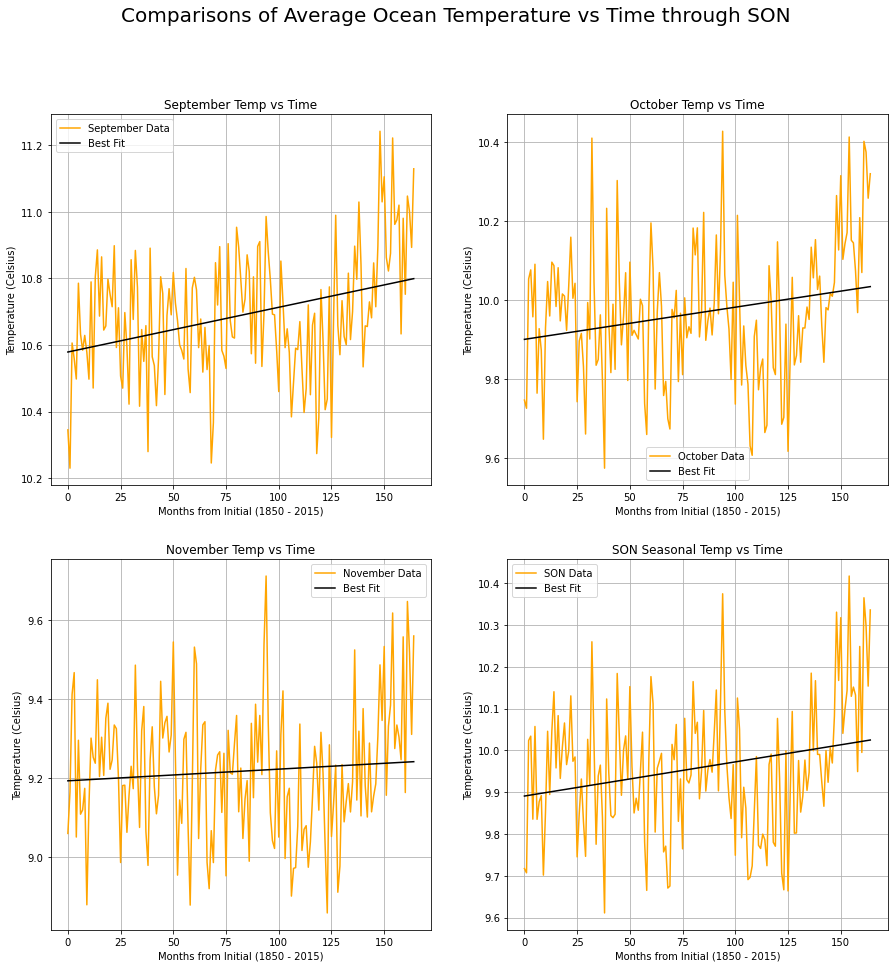

In [32]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
axs=ax.flatten()

#creating a 2x2 panel figure for the following SON pertinent data

l1=axs[0].plot(time, September, "orange", label = "September Data")
m, b = np.polyfit(time, September, 1)
axs[0].plot(time, m*time + b, "black", label = "Best Fit")
axs[0].set_title("September Temp vs Time")
axs[0].set_xlabel("Months from Initial (1850 - 2015)")
axs[0].set_ylabel("Temperature (Celsius)")
axs[0].grid()
axs[0].legend()


#plotting monthly cosine weighted TS data from September vs time

l2=axs[1].plot(time, October, "orange", label = "October Data")
m, b = np.polyfit(time, October, 1)
axs[1].plot(time, m*time + b, "black", label = "Best Fit")
axs[1].set_title("October Temp vs Time")
axs[1].set_xlabel("Months from Initial (1850 - 2015)")
axs[1].set_ylabel("Temperature (Celsius)")
axs[1].grid()
axs[1].legend()


#plotting monthly cosine weighted TS data from October vs time

l3=axs[2].plot(time, November, "orange", label = "November Data")
m, b = np.polyfit(time, November, 1)
axs[2].plot(time, m*time + b, "black", label = "Best Fit")
axs[2].set_title("November Temp vs Time")
axs[2].set_xlabel("Months from Initial (1850 - 2015)")
axs[2].set_ylabel("Temperature (Celsius)")
axs[2].grid()
axs[2].legend()


#plotting monthly cosine weighted TS data from November vs time

l4=axs[3].plot(time, SON, "orange", label = "SON Data")
m, b = np.polyfit(time, SON, 1)
axs[3].plot(time, m*time + b, "black", label = "Best Fit")
axs[3].set_title("SON Seasonal Temp vs Time")
axs[3].set_xlabel("Months from Initial (1850 - 2015)")
axs[3].set_ylabel("Temperature (Celsius)")
axs[3].grid()
axs[3].legend()


#plotting seasonal cosine weighted TS data from SON vs time

plt.suptitle("Comparisons of Average Ocean Temperature vs Time through SON", fontsize = 20)
plt.show()

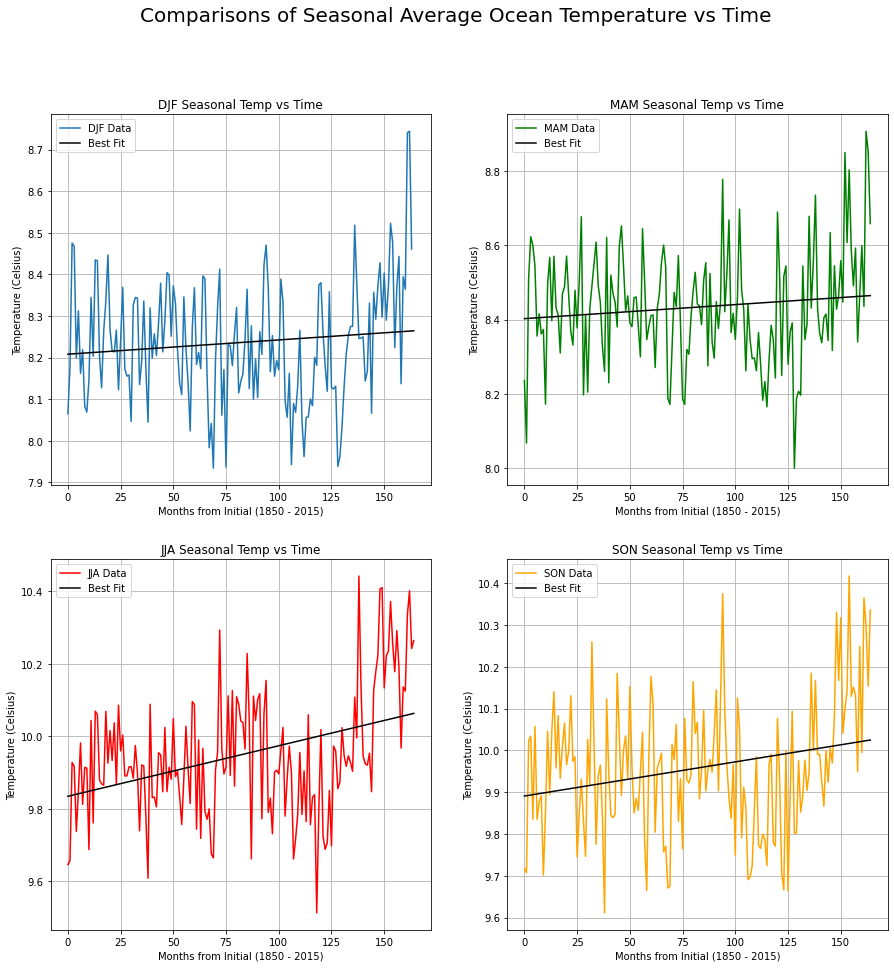

In [33]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
axs=ax.flatten()

#creating a 2x2 panel figure for the following seasonal data

l1=axs[0].plot(time2, DJF, label = "DJF Data")
m, b = np.polyfit(time2, DJF, 1)
axs[0].plot(time, m*time + b, "black", label = "Best Fit")
axs[0].set_title("DJF Seasonal Temp vs Time")
axs[0].set_xlabel("Months from Initial (1850 - 2015)")
axs[0].set_ylabel("Temperature (Celsius)")
axs[0].grid()
axs[0].legend()

#plotting seasonal cosine weighted TS data from DJF vs time

l2=axs[1].plot(time, MAM, "g", label = "MAM Data")
m, b = np.polyfit(time, MAM, 1)
axs[1].plot(time, m*time + b, "black", label = "Best Fit")
axs[1].set_title("MAM Seasonal Temp vs Time")
axs[1].set_xlabel("Months from Initial (1850 - 2015)")
axs[1].set_ylabel("Temperature (Celsius)")
axs[1].grid()
axs[1].legend()


#plotting seasonal cosine weighted TS data from MAM vs time

l3=axs[2].plot(time, JJA, "r", label = "JJA Data")
m, b = np.polyfit(time, JJA, 1)
axs[2].plot(time, m*time + b, "black", label = "Best Fit")
axs[2].set_title("JJA Seasonal Temp vs Time")
axs[2].set_xlabel("Months from Initial (1850 - 2015)")
axs[2].set_ylabel("Temperature (Celsius)")
axs[2].grid()
axs[2].legend()


#plotting seasonal cosine weighted TS data from JJA vs time

l4=axs[3].plot(time, SON, "orange", label = "SON Data")
m, b = np.polyfit(time, SON, 1)
axs[3].plot(time, m*time + b, "black", label = "Best Fit")
axs[3].set_title("SON Seasonal Temp vs Time")
axs[3].set_xlabel("Months from Initial (1850 - 2015)")
axs[3].set_ylabel("Temperature (Celsius)")
axs[3].grid()
axs[3].legend()

#plotting seasonal cosine weighted TS data from SON vs time

plt.suptitle("Comparisons of Seasonal Average Ocean Temperature vs Time", fontsize = 20)
plt.show()

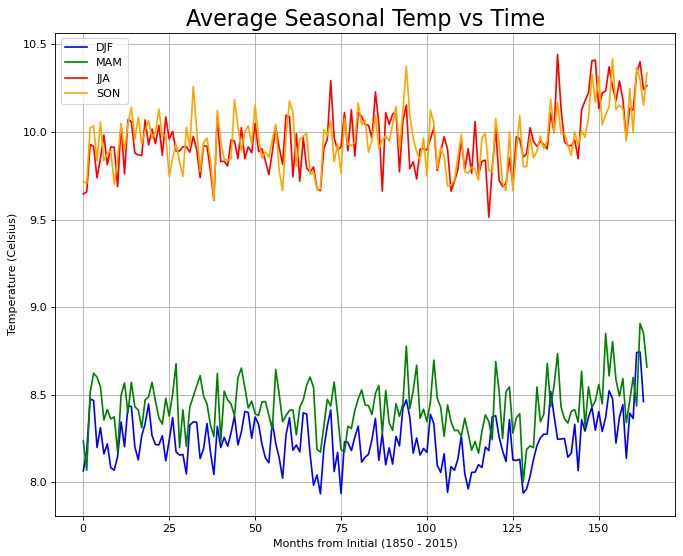

In [34]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(time2, DJF, label = "DJF", color = "b")
plt.plot(time, MAM, label = "MAM", color = "g")
plt.plot(time, JJA, label = "JJA", color = "r")
plt.plot(time, SON, label = "SON", color = "orange")
plt.title("Average Seasonal Temp vs Time", fontsize = 20)
plt.xlabel("Months from Initial (1850 - 2015)")
plt.ylabel("Temperature (Celsius)")
plt.legend()
plt.grid()

#plotting comparative seasonal cosine weighted TS data vs time
#plotting them all on the same graph we can see how each season not only varies with time but how it compares to the others